# Desafio - Regrassão Linear Polinomial

Este notebook apresenta uma solução para o desafio proposto no arquivo [INSTRUCT.md](./INSTRUCT.md)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset

df_vendas = pd.read_csv('./dataset/sales_data.csv')

In [3]:
# Inspecionar a estrutura do dataframe

df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_de_experiencia  100 non-null    int64  
 1   numero_de_vendas      100 non-null    int64  
 2   fator_sazonal         100 non-null    int64  
 3   receita_em_reais      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [4]:
# Copiar o DF para um DF EDA

df_vendas_eda = df_vendas.copy()

In [5]:
# Copiar o DF para um DF EDA

df_vendas_bucketing = df_vendas.copy()

### EDA 

In [6]:
# Visualizar os dados 

df_vendas_eda.head(10)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
0,36,21,5,2639.886941
1,74,44,10,4707.322227
2,38,44,4,5910.035131
3,52,62,6,6130.742546
4,97,56,2,7516.457681
5,67,70,10,1247.882324
6,119,69,2,3485.606208
7,66,62,2,2773.987427
8,68,96,3,4177.919578
9,106,42,2,4719.691069


In [7]:
# Detectar valores ausentes

df_vendas_eda.isna().sum()

tempo_de_experiencia    0
numero_de_vendas        0
fator_sazonal           0
receita_em_reais        0
dtype: int64

In [8]:
# Medidas estatísticas no DF

df_vendas_eda.describe()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
count,100.000000,100.000000,100.000000,100.000000
mean,64.490000,54.490000,5.820000,5112.941924
std,32.397935,25.307201,2.836914,2544.731052
min,1.000000,10.000000,1.000000,1133.363948
25%,38.750000,37.500000,4.000000,2800.660516
50%,64.500000,52.500000,5.000000,4953.770034
75%,93.000000,70.500000,8.000000,7079.500163
max,119.000000,100.000000,10.000000,9941.016458


<Axes: xlabel='tempo_de_experiencia'>

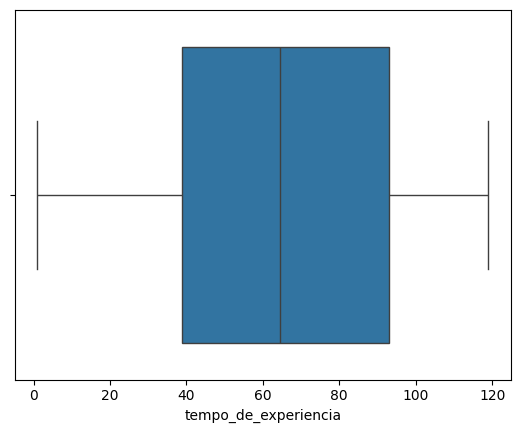

In [10]:
# Verificar / detectar outliers

sns.boxplot(data=df_vendas_eda, x='tempo_de_experiencia')

<Axes: xlabel='numero_de_vendas'>

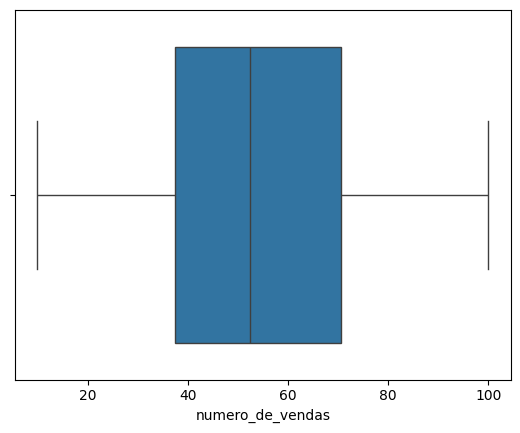

In [11]:
sns.boxplot(data=df_vendas_eda, x='numero_de_vendas')

<Axes: xlabel='fator_sazonal'>

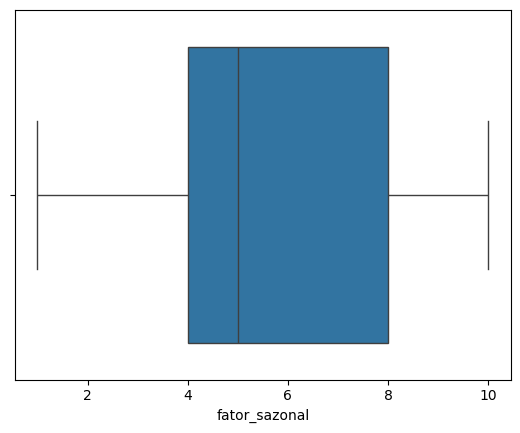

In [12]:
sns.boxplot(data=df_vendas_eda, x='fator_sazonal')

<Axes: xlabel='receita_em_reais'>

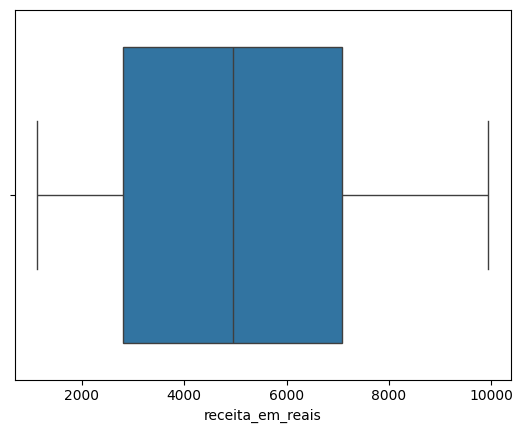

In [13]:
sns.boxplot(data=df_vendas_eda, x='receita_em_reais')

<Axes: xlabel='tempo_de_experiencia', ylabel='receita_em_reais'>

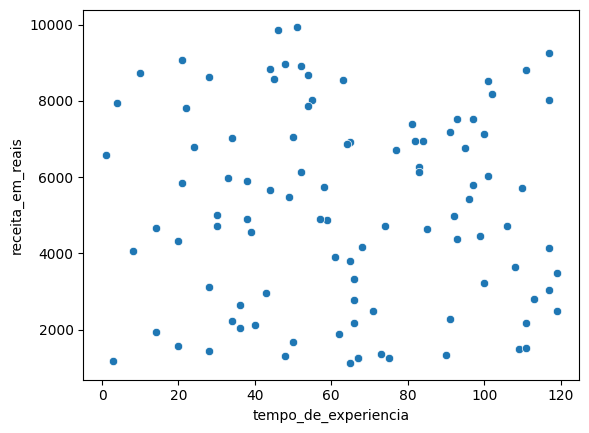

In [ ]:
# Cruzamento variáveis numéricas com salario em reais (variável dependente)

sns.scatterplot(data=df_vendas_eda, x='tempo_de_experiencia', y='receita_em_reais')

<Axes: xlabel='numero_de_vendas', ylabel='receita_em_reais'>

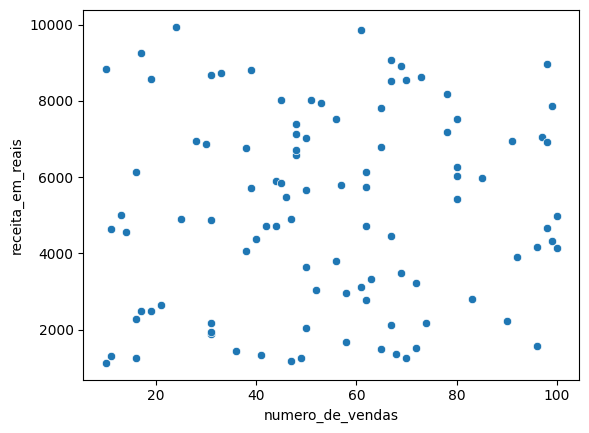

In [16]:
sns.scatterplot(data=df_vendas_eda, x='numero_de_vendas', y='receita_em_reais')

<Axes: xlabel='fator_sazonal', ylabel='receita_em_reais'>

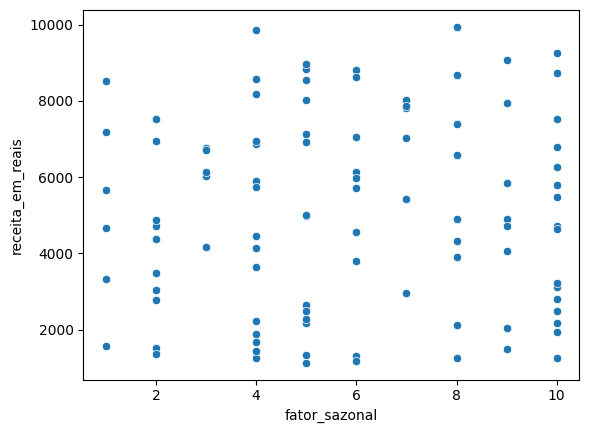

In [17]:
sns.scatterplot(data=df_vendas_eda, x='fator_sazonal', y='receita_em_reais')

<Axes: xlabel='tempo_de_experiencia', ylabel='numero_de_vendas'>

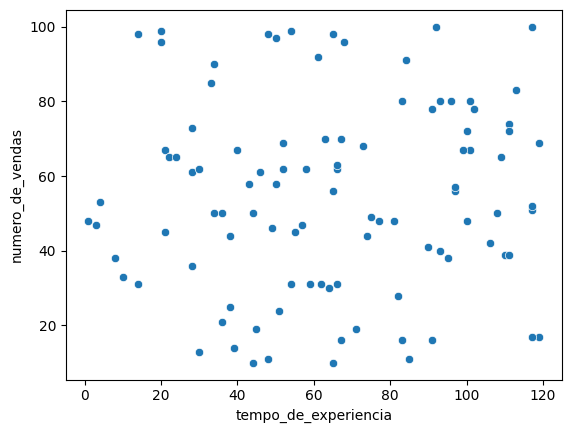

In [18]:
sns.scatterplot(data=df_vendas_eda, x='tempo_de_experiencia', y='numero_de_vendas')

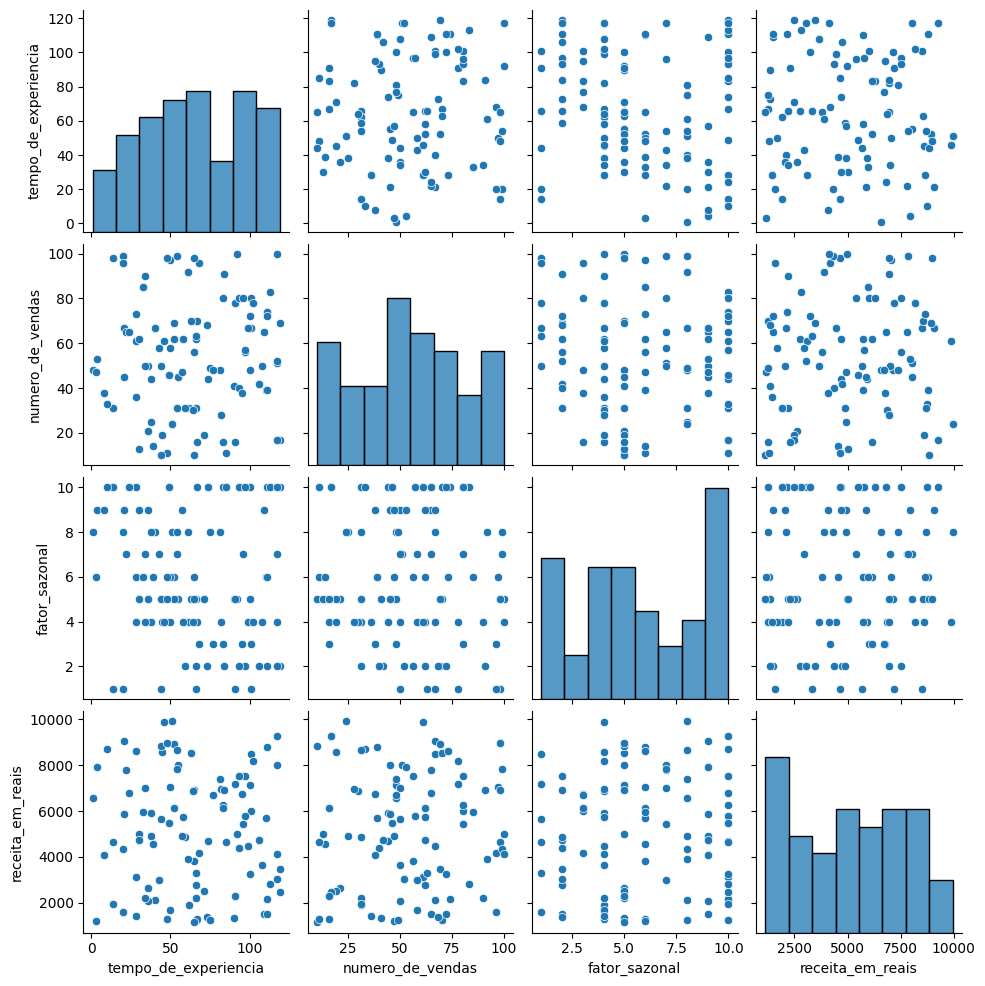

In [19]:
# Histogramas das variáveis

sns.pairplot(data=df_vendas_eda)

<Axes: >

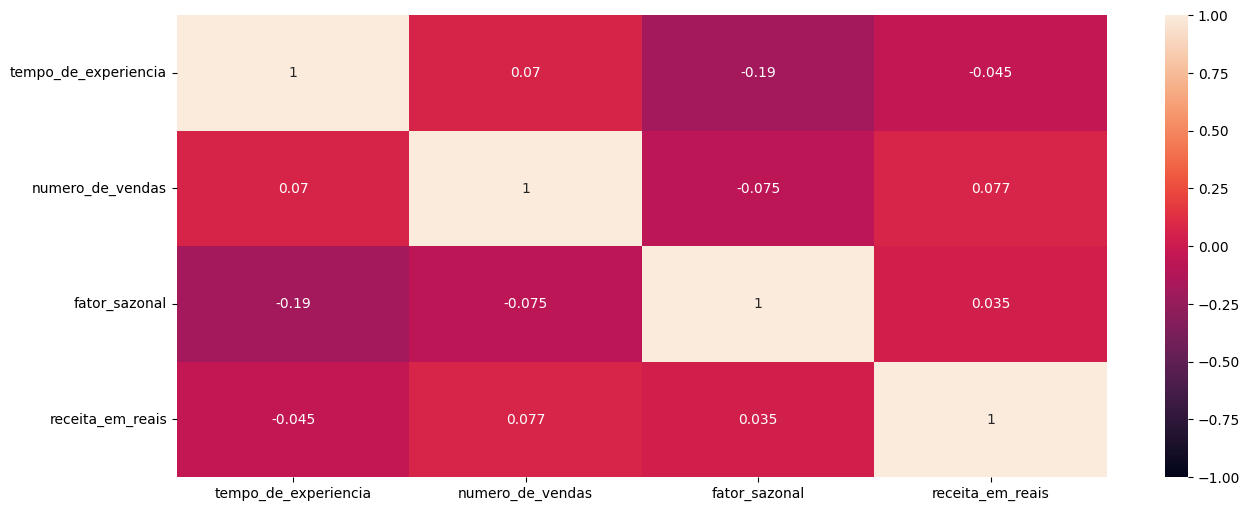

In [20]:
# Mapa de Calor 

plt.figure(figsize=(15,6))
sns.heatmap(df_vendas_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

<Axes: >

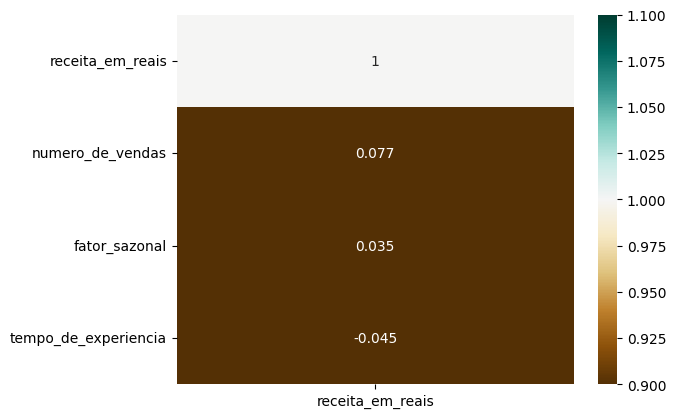

In [22]:
# Formato de Ranking

sns.heatmap(df_vendas_eda.corr('spearman')[['receita_em_reais']].sort_values(by='receita_em_reais', ascending=False), vmin=1, vmax=1, annot=True, cmap='BrBG')

In [26]:
# Bucketing tempo de casa

bins_tempo_experiencia = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

labels_tempo_experiencia = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149']

df_vendas_bucketing['escala_tempo'] = pd.cut(x=df_vendas_bucketing['tempo_de_experiencia'], bins=bins_tempo_experiencia, labels=labels_tempo_experiencia, include_lowest=True)

In [27]:
df_vendas_bucketing.head(20)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais,escala_tempo
0,36,21,5,2639.886941,30-39
1,74,44,10,4707.322227,70-79
2,38,44,4,5910.035131,30-39
3,52,62,6,6130.742546,50-59
4,97,56,2,7516.457681,90-99
5,67,70,10,1247.882324,60-69
6,119,69,2,3485.606208,110-119
7,66,62,2,2773.987427,60-69
8,68,96,3,4177.919578,60-69
9,106,42,2,4719.691069,100-109


<Axes: xlabel='escala_tempo', ylabel='receita_em_reais'>

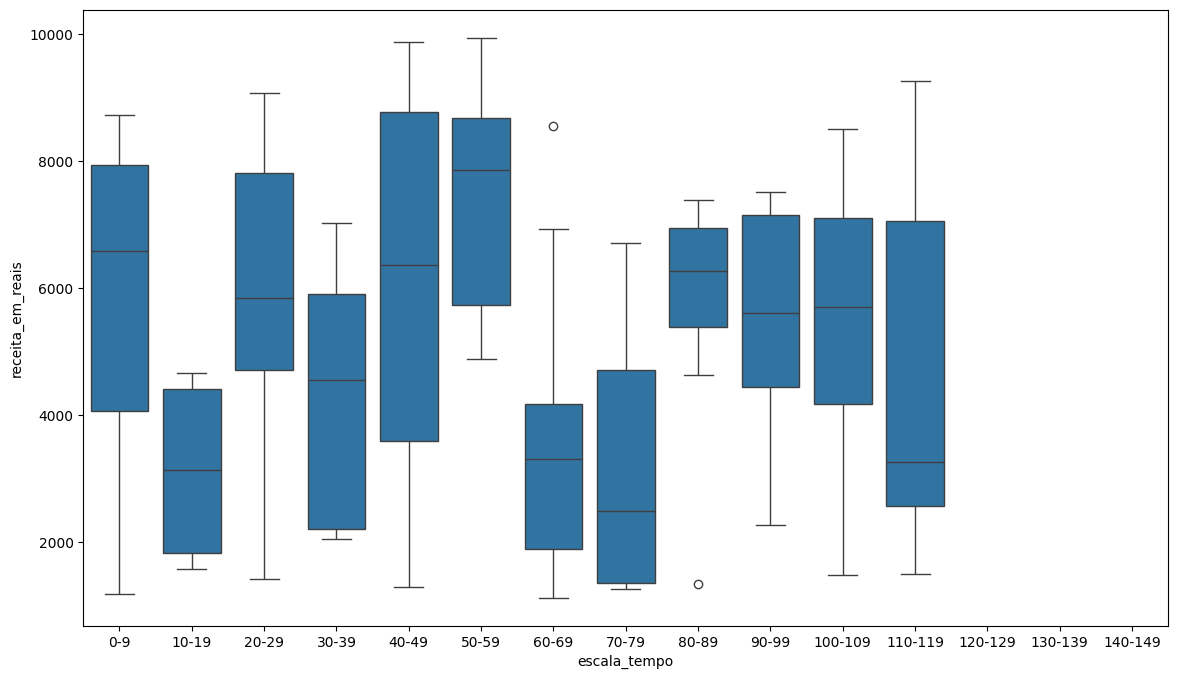

In [28]:
plt.figure(figsize=(14,8))
sns.boxplot(df_vendas_bucketing, x='escala_tempo', y='receita_em_reais')

### Treinamento do Modelo Linear

In [29]:
# Importar Bibliotecas

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

In [30]:
# Criar o Dataset de Treino e Teste

X = df_vendas.drop(columns='receita_em_reais', axis=1)
y = df_vendas['receita_em_reais']

In [31]:
# Split usando KFold com 5 pastas/splits

kf = KFold(n_splits=5, shuffle=True, random_state=51)

In [32]:
kf.split(X)

<generator object _BaseKFold.split at 0x745ae628e0e0>

In [35]:
# Bloco para Treinamento do Modelo

# Pipeline
# Padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

# Nomes das Colunas

colunas_numericas = ['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal']

# Transformer para colunas numéricas
transformer_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criar um ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas)
    ]
)

# Criando o Pipeline principais = Pré-Processamento + Treinamento

model_regr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

# Armazenar RMSE Treino e Teste

rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score de Teste
r2score_fold_test = []

# Armazenar resíduos 

residuos = []

# Armazenar predições

y_pred_total = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treine o modelo no conjunto de treinamento
    model_regr.fit(X_train, y_train)

    # Faça predições nos conjuntos de treinamentos e test
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)

    # Calcule o RMSE, R2Score e Residuos para os conjuntos de treinamento
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Calcule o R2Score e Residuos para conjunto de teste
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    # Armazena as métricas da iteração na lista
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)

r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
residuos = np.array(residuos).reshape(-1)

y_pred_total = np.array(y_pred_total).reshape(-1)


### Análise de Métricas - Modelo Linear

In [36]:
# Métricas 

print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_test_final}')

RMSE Treino: 2503.7778480738625
RMSE Teste: 2657.652017969138
% Dif. RMSE Treino e Teste: 6.1456798179458945
R2Score Teste: -0.14445717564615218


### Análise de Resíduos - Modelo Linear

In [37]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao

from scipy.stats import zscore
residuos_std = zscore(residuos)

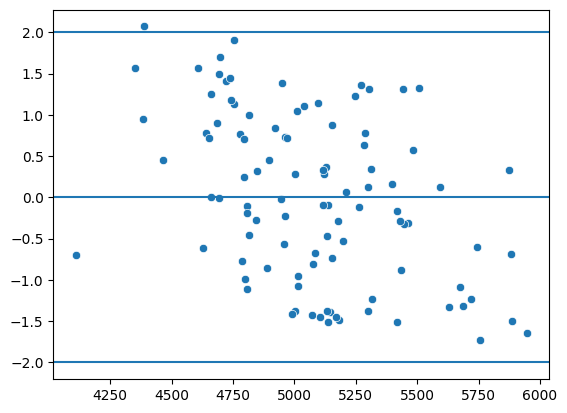

In [38]:
# Verificar linearidade dos residuos: Valores entre -2 e +2 (Escala Padrão)
# Verificar homocedasticidade: Valores em torno da reta sem nenhuma tendência ou formato

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

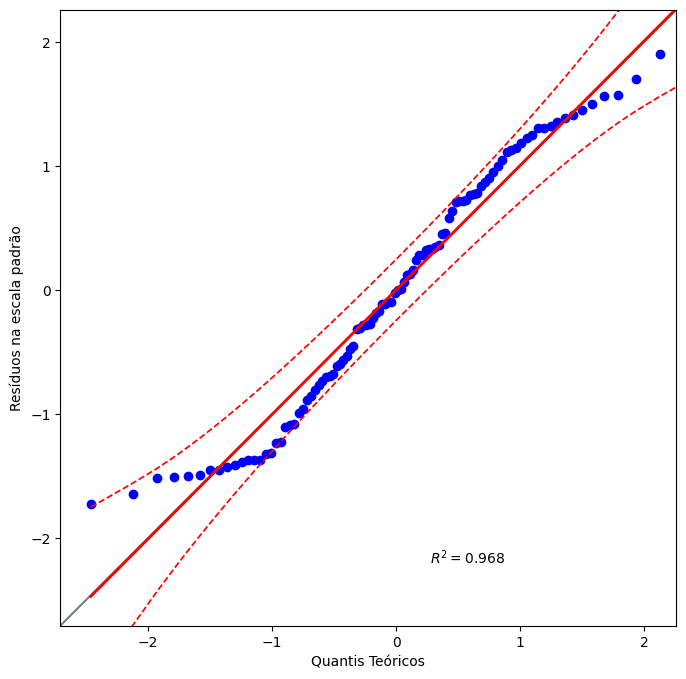

In [39]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot

import pingouin as pg

plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [40]:
# Testes de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)

print(f"Estat. Teste {stat_shapiro} e P-Value {p_value_shapiro}")

Estat. Teste 0.9603400453291031 e P-Value 0.004252356300943484


In [41]:
# Testes de normalidade - Kolmogorov-Sminorv

stat_ks, p_value_ks = kstest(residuos, 'norm')

print(f"Estat. Teste {stat_ks} e P-Value {p_value_ks}")

Estat. Teste 0.5 e P-Value 1.2131434371817858e-23


In [42]:
# Testes de normalidade - Lilliefors

stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')

print(f"Estat. Teste {stat_ll} e P-Value {p_value_ll}")

Estat. Teste 0.0787194047136276 e P-Value 0.1409104092052727


### Treinar Modelo Polinominal

In [43]:
# Exemplo de criação de Features Polinominais

feat_poly = PolynomialFeatures(degree=3, include_bias=False)

X_poly = feat_poly.fit_transform(X)
feat_poly.feature_names_in_

array(['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal'],
      dtype=object)

In [44]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal',
       'tempo_de_experiencia^2', 'tempo_de_experiencia numero_de_vendas',
       'tempo_de_experiencia fator_sazonal', 'numero_de_vendas^2',
       'numero_de_vendas fator_sazonal', 'fator_sazonal^2',
       'tempo_de_experiencia^3',
       'tempo_de_experiencia^2 numero_de_vendas',
       'tempo_de_experiencia^2 fator_sazonal',
       'tempo_de_experiencia numero_de_vendas^2',
       'tempo_de_experiencia numero_de_vendas fator_sazonal',
       'tempo_de_experiencia fator_sazonal^2', 'numero_de_vendas^3',
       'numero_de_vendas^2 fator_sazonal',
       'numero_de_vendas fator_sazonal^2', 'fator_sazonal^3'],
      dtype=object)

In [45]:
# Importar Bibliotecas

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

In [63]:
# Bloco para Treinamento do Modelo

# graus_polynominal = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

graus_polynominal = [2]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# Split usando KFold com 5 pastas/splits

kf = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynominal:


    # Pipeline
    # Padronizar variáveis numéricas - tempo_na_empresa, nivel_na_empresa

    # Nomes das Colunas

    colunas_numericas = ['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal']

    # Transformer para colunas numéricas
    transformer_numericas = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Criar um ColumnTransformer

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', transformer_numericas, colunas_numericas)
        ]
    )

    # Criar Features Polinominais

    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # Criando o Pipeline principais = Pré-Processamento + Treinamento

    model_poly = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('poly_features', poly_feat),
            ('regressor', LinearRegression())
        ]
    )

    # Armazenar RMSE Treino e Teste

    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar R2 Score de Teste
    r2score_fold_test = []

    # Armazenar resíduos 

    residuos = []

    # Armazenar predições

    y_pred_total = []


    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treine o modelo no conjunto de treinamento
        model_poly.fit(X_train, y_train)

        # Faça predições nos conjuntos de treinamentos e test
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcule o RMSE, R2Score e Residuos para os conjuntos de treinamento
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test= np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Calcule o R2Score e Residuos para conjunto de teste
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        # Armazena as métricas da iteração na lista
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)

    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100
    residuos = np.array(residuos).reshape(-1)

    y_pred_total = np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)


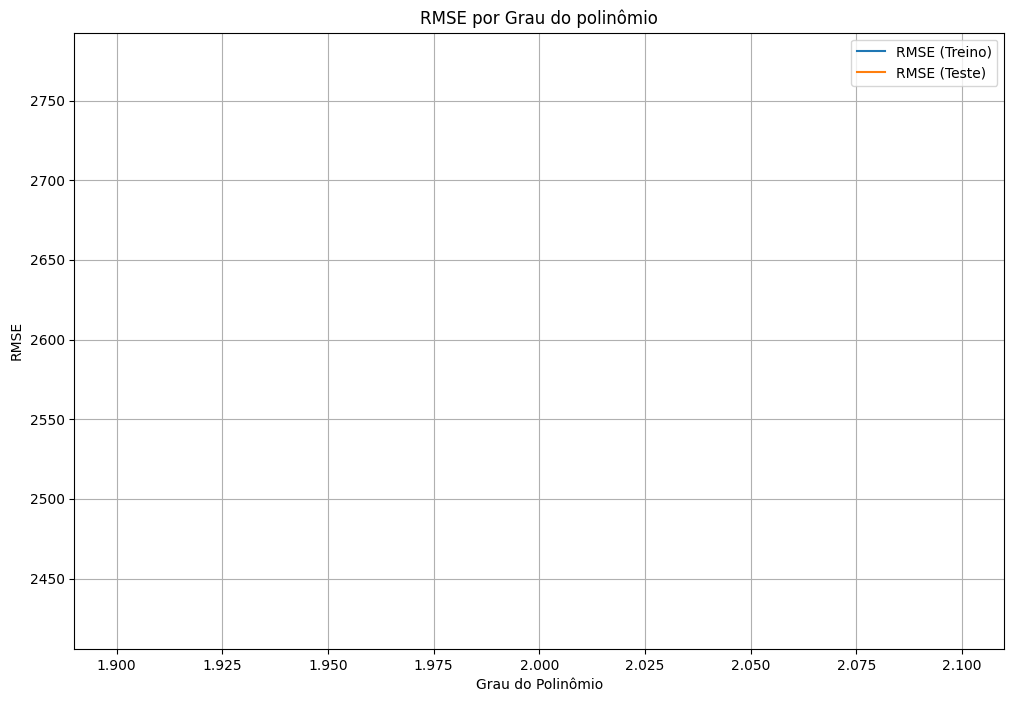

In [57]:
# Plotar gráfico para comparar RMSE dos polinomios

plt.figure(figsize=(12,8))
plt.plot(graus_polynominal, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_polynominal, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por Grau do polinômio')
plt.legend()
plt.grid(True)
plt.show()

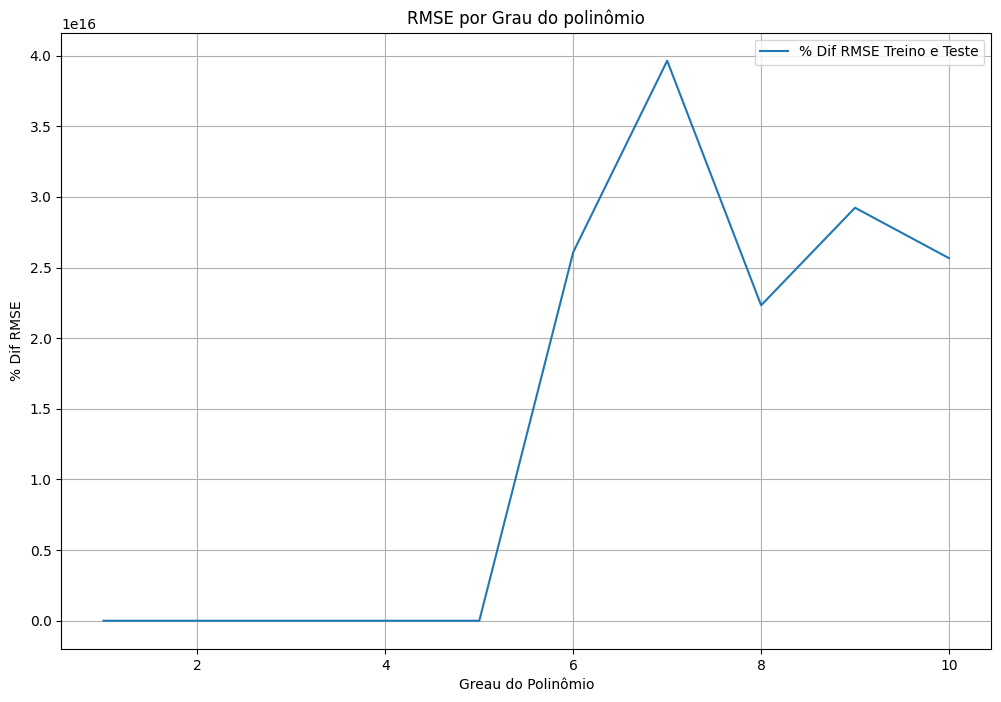

In [49]:
# Plotar gráfico para comparar %Dif RMSE (Treino e teste)

plt.figure(figsize=(12,8))
plt.plot(graus_polynominal, percentual_rmse_values, label='% Dif RMSE Treino e Teste')
plt.xlabel('Greau do Polinômio')
plt.ylabel('% Dif RMSE')
plt.title('RMSE por Grau do polinômio')
plt.legend()
plt.grid(True)
plt.show()

### Análise de Métricas - Polinominal

In [64]:
# Métricas 

print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Teste: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_test_final}')

RMSE Treino: 2423.5170534288945
RMSE Teste: 2775.008357109534
% Dif. RMSE Treino e Teste: 14.503355905143497
R2Score Teste: -0.24666490724311388


### Análise de Resíduos - Modelo Polinominal

In [65]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao

from scipy.stats import zscore
residuos_std = zscore(residuos)

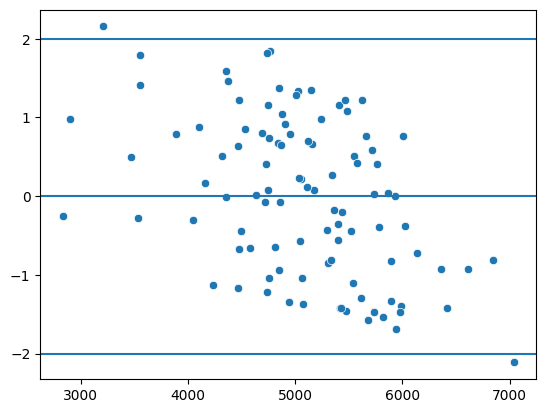

In [66]:
# Verificar linearidade dos residuos: Valores entre -2 e +2 (Escala Padrão)
# Verificar homocedasticidade: Valores em torno da reta sem nenhuma tendência ou formato

sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

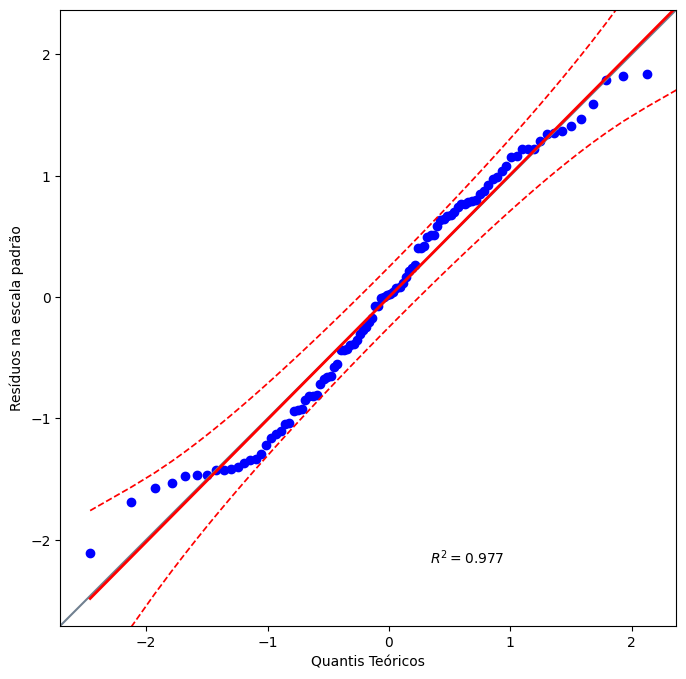

In [67]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot

import pingouin as pg

plt.figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [68]:
# Testes de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors
stat_shapiro, p_value_shapiro = shapiro(residuos)

print(f"Estat. Teste {stat_shapiro} e P-Value {p_value_shapiro}")

Estat. Teste 0.9719685335704997 e P-Value 0.0313339693253917


In [69]:
# Testes de normalidade - Kolmogorov-Sminorv

stat_ks, p_value_ks = kstest(residuos, 'norm')

print(f"Estat. Teste {stat_ks} e P-Value {p_value_ks}")

Estat. Teste 0.53 e P-Value 9.783646983229687e-27


In [70]:
# Testes de normalidade - Lilliefors

stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')

print(f"Estat. Teste {stat_ll} e P-Value {p_value_ll}")

Estat. Teste 0.07546356887253913 e P-Value 0.18511179596819682


### Realizar Predições Individuais

In [78]:
input_features = {
    'tempo_de_experiencia': 15,
    'numero_de_vendas': 10,
    'fator_sazonal': 1
}

pred_df = pd.DataFrame(input_features, index=[1])

In [79]:
# Predição

model_poly.predict(pred_df)

array([-1123.2942723])

In [80]:
import joblib

In [81]:
# Salvar o modelo

joblib.dump(model_poly, './modelo_salario.pkl')

['./modelo_salario.pkl']